In [ ]:
import os
import zipfile # Import the zipfile module
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Paths to cats and dogs directories
cat_dir = os.path.join("/content/animal_dataset", "cats_set")
dog_dir = os.path.join("/content/animal_dataset", "dogs_set")

In [ ]:
# ========================
# 1. Unzip Dataset
# ========================
extract_path = "/content/animal dataset.zip"  # ZIP file path
with zipfile.ZipFile(extract_path, 'r') as zip_ref:
    zip_ref.extractall("/content/animal_dataset")

# Paths to cats and dogs directories
cat_dir = os.path.join("/content/animal_dataset", "cats_set")
dog_dir = os.path.join("/content/animal_dataset", "dogs_set")


In [ ]:
# 2. Load and Preprocess Images
# ========================
IMG_SIZE = (64, 64)
data = []
labels = []

# Load cats
for img_name in os.listdir(cat_dir)[:500]:  # limit to 100 for speed
    img_path = os.path.join(cat_dir, img_name)
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0  # normalize
    data.append(img_array)
    labels.append(0)  # Cat = 0

In [ ]:
# Load dogs
for img_name in os.listdir(dog_dir)[:500]:
    img_path = os.path.join(dog_dir, img_name)
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    data.append(img_array)
    labels.append(1)  # Dog = 1

In [ ]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

print("Total images loaded:", data.shape[0])
print("Image shape:", data.shape)
print("Labels shape:", labels.shape)


Total images loaded: 1000
Image shape: (1000, 64, 64, 3)
Labels shape: (1000,)


In [ ]:
# 4. Train-Validation-Test Split
# ===================================
# Split into train (70%), temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    data, labels, test_size=0.30, random_state=42, stratify=labels
)

# Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (700, 64, 64, 3) (700,)
Validation set: (150, 64, 64, 3) (150,)
Test set: (150, 64, 64, 3) (150,)


In [ ]:
# 5. Build CNN Model (Binary Classification)
# ===================================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes (Cat=0, Dog=1)
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 6. Train the Model
# ===================================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 290ms/step - accuracy: 0.4819 - loss: 0.7166 - val_accuracy: 0.5467 - val_loss: 0.6927
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step - accuracy: 0.5177 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step - accuracy: 0.5164 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 211ms/step - accuracy: 0.5133 - loss: 0.6894 - val_accuracy: 0.6000 - val_loss: 0.6894
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.5958 - loss: 0.6839 - val_accuracy: 0.5067 - val_loss: 0.6921
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step - accuracy: 0.6236 - loss: 0.6584 - val_accuracy: 0.5667 - val_loss: 0.6801
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 215ms/step - accuracy: 0.6884 - loss: 0.6261 - val_accuracy: 0.5800 - val_loss: 0.7211
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 287ms/step - accuracy: 0.6952 - loss: 0.6195 - val_accuracy: 0

In [ ]:
# 7. Evaluate on Test Set
# ===================================
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.6785 - loss: 1.1429

Final Test Accuracy: 0.6800


Text(0.5, 1.0, 'Model Accuracy')

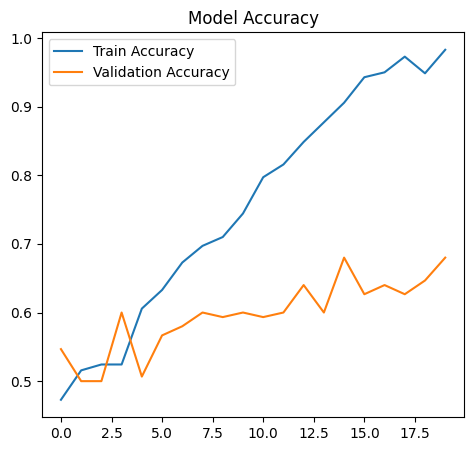

In [ ]:
# 9. Plot Training Curves
# ===================================
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')


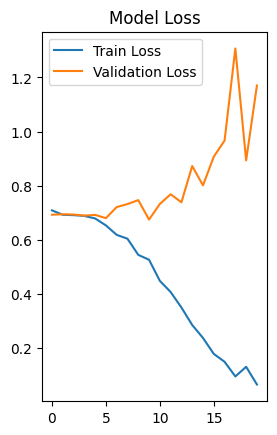

In [ ]:
# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [ ]:
# 10. Prediction on a Single Image
# ===================================
def predict_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    class_label = "Cat" if predicted_class == 0 else "Dog"
    print(f"Predicted class: {class_label}")

# Test on a sample image
predict_image(os.path.join(cat_dir, os.listdir(cat_dir)[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Predicted class: Cat
